# IEEE EUI Data Science Bootcamp
## Predict sales prices and practice feature engineering and advanced regression techniques.
#### Ramzy Bakir submission

### Relevant Packages and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statistics import mean, mode, median

### Importing the Data Set

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Wrangling & Cleaning

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We observe that our dataset comprises both numerical data (int64 and float64) and categorical data (object). However, there is an uneven distribution of non-null entries, necessitating further attention and handling. Additionally, we need to determine whether any of the categorical data should be converted into numerical form for our analysis.

### Numerical & Categorical data

Data can be categorized into two primary types: numerical and categorical. Numerical data encompasses both continuous, such as temperature measurements, and discrete, like counts of items. On the other hand, categorical data includes nominal data without any inherent order, such as colors or types of fruit, and ordinal data with a meaningful ranking, like education levels or satisfaction ratings.

In [4]:
numerical_data = train.select_dtypes(include=[np.number])
numerical_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
categorical_data = train.select_dtypes(include=[object])
categorical_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [6]:
categorical_data.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [7]:
def null_table(dataset):    
    null_list = []
    for i in dataset:
        if dataset[i].isnull().any():
            null_list.append(dataset[i].isnull().value_counts())
    return pd.DataFrame(pd.concat(null_list, axis=1).T)
null_train = null_table(categorical_data)
null_train

,True,False
Alley,1369,91
MasVnrType,8,1452
BsmtQual,37,1423
BsmtCond,37,1423
BsmtExposure,38,1422
BsmtFinType1,37,1423
BsmtFinType2,38,1422
Electrical,1,1459
FireplaceQu,690,770
GarageType,81,1379


It appears that there is a significant presence of missing values in the dataset. However, upon closer examination of the variable descriptions, it becomes evident that in certain cases, the null values convey specific information. For instance, when dealing with categorical attributes that describe aspects like the presence of a basement,garage or pool, null values indicate that the house lacks these features. It's important to note, though, that this interpretation doesn't apply universally to all categorical or numerical features in the dataset.

In [8]:
# Missing categorical features are usualy filled with the " Imputation with Mode (Most Frequent Value) " method
train['Electrical'] = train.Electrical.fillna(mode(train.Electrical)) 
train['MasVnrType'] = train.MasVnrType.fillna(mode(train.MasVnrType)) 

In [9]:
null_train = null_table(numerical_data)
null_train

,False,True
LotFrontage,1201,259
MasVnrArea,1452,8
GarageYrBlt,1379,81


In [10]:
# Missing  numerical continuous features are usualy filled with the median value
train['MasVnrArea'] = train.MasVnrArea.fillna(median(train.MasVnrArea)) 
# Missing  numerical discrete features are usualy filled with a 0 value
train['GarageYrBlt'] = train.GarageYrBlt.fillna(0).astype(int)

In [11]:
null_train = null_table(test)
null_train

,False,True
MSZoning,1455,4
LotFrontage,1232,227
Alley,107,1352
Utilities,1457,2
Exterior1st,1458,1
Exterior2nd,1458,1
MasVnrType,1443,16
MasVnrArea,1444,15
BsmtQual,1415,44
BsmtCond,1414,45


The test data has more features with null values that cannot be ignored, so we need to impute these missing entries. We will clean the test data using the same methods as the training data.

In [12]:
# The test data contains a much larger number of missing values that would affect the peformance of our model and predicitons

# Missing categorical features are usualy filled with the " Imputation with Mode (Most Frequent Value) " method
test['MSZoning'] = test.MSZoning.fillna(mode(pd.concat([test['MSZoning'], test['MSZoning']], axis=0)))
test['Utilities'] = test.Utilities.fillna(mode(pd.concat([test['Utilities'], test['Utilities']], axis=0)))
test['Exterior1st'] = test.Exterior1st.fillna(mode(pd.concat([test['Exterior1st'], test['Exterior1st']], axis=0)))
test['Exterior2nd'] = test.Exterior2nd.fillna(mode(pd.concat([test['Exterior2nd'], test['Exterior2nd']], axis=0)))
test['MasVnrType'] = test.MasVnrType.fillna(mode(pd.concat([test['MasVnrType'], test['MasVnrType']], axis=0)))
test['BsmtFullBath'] = test.BsmtFullBath.fillna(mode(pd.concat([test['BsmtFullBath'], test['BsmtFullBath']], axis=0)))
test['BsmtHalfBath'] = test.BsmtHalfBath.fillna(mode(pd.concat([test['BsmtHalfBath'], test['BsmtHalfBath']], axis=0)))
test['KitchenQual'] = test.KitchenQual.fillna(mode(pd.concat([test['KitchenQual'], test['KitchenQual']], axis=0)))
test['Functional'] = test.Functional.fillna(mode(pd.concat([test['Functional'], test['Functional']], axis=0)))
test['SaleType'] = test.SaleType.fillna(mode(pd.concat([test['SaleType'], test['SaleType']], axis=0)))
test['GarageCars'] = test.GarageCars.fillna(mode(pd.concat([test['GarageCars'], test['GarageCars']], axis=0)))
# Missing  numerical continuous features are usualy filled with the median value
test['GarageArea'] = test.GarageArea.fillna(median(pd.concat([test['GarageArea'], test['GarageArea']], axis=0)))
test['MasVnrArea'] = test.MasVnrArea.fillna(median(pd.concat([test['MasVnrArea'], test['MasVnrArea']], axis=0)))
test['BsmtFinSF1'] = test.BsmtFinSF1.fillna(median(pd.concat([test['BsmtFinSF1'], test['BsmtFinSF1']], axis=0)))
test['BsmtFinSF2'] = test.BsmtFinSF2.fillna(median(pd.concat([test['BsmtFinSF2'], test['BsmtFinSF2']], axis=0)))
test['BsmtUnfSF'] = test.BsmtUnfSF.fillna(median(pd.concat([test['BsmtUnfSF'], test['BsmtUnfSF']], axis=0)))
test['TotalBsmtSF'] = test.TotalBsmtSF.fillna(median(pd.concat([test['TotalBsmtSF'], test['TotalBsmtSF']], axis=0)))
# Missing  numerical discrete features are usualy filled with a 0 value
test['GarageYrBlt'] = test.GarageYrBlt.fillna(0).astype(int)

In [13]:
# Fill NA data for categorical features
train[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']]= train[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].fillna('NA')
test[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = test[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].fillna('NA')

Next, we will split the data into four groups based on its data type: numerical continuous, numerical discrete, categorical nominal, and categorical ordinal. This will allow us to perform appropriate exploratory data analysis (EDA) methods on each group.

In [14]:
# Gradient Boosting Regression such as XGBoost can work with categorical data but they are designed for numerical data thus categorical data needs to be transformed into numerical data to suit the model , we can use methods such as Ordinal Encoding and One-Hot Encoding

# Dataset of only continuous numerical data
train_continuous = train[['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']]
test_continuous = test[['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']]

# Dataset of only discrete numerical data
train_discrete = train[['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageYrBlt', 'MoSold', 'YrSold']]
test_discrete = test[['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageYrBlt', 'MoSold', 'YrSold']]

# CDataset for only nominal categorical data
train_nominal = train[['Alley', 'GarageType', 'MiscFeature','MSZoning', 'MSSubClass', 'Street', 'LandContour','LotConfig', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation','Heating', 'CentralAir', 'SaleType', 'SaleCondition']]
test_nominal = test[['Alley', 'GarageType', 'MiscFeature','MSZoning', 'MSSubClass', 'Street', 'LandContour','LotConfig', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation','Heating', 'CentralAir', 'SaleType', 'SaleCondition']]

# Dataset of only ordinal categorical data
train_ordinal = train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtFinType1', 'BsmtFinType2', 'FireplaceQu','LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'PoolQC', 'Fence']]
test_ordinal = test[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtFinType1', 'BsmtFinType2', 'FireplaceQu','LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'PoolQC', 'Fence']]

### Exploratory data analysis

In this section, we'll dive into the exploratory Data Analysis process, a critical step in our quest to improve our model predictive results. Here, we'll use charts and numbers to understand our data better, find patterns, and get ready to make our predictions more accurate.

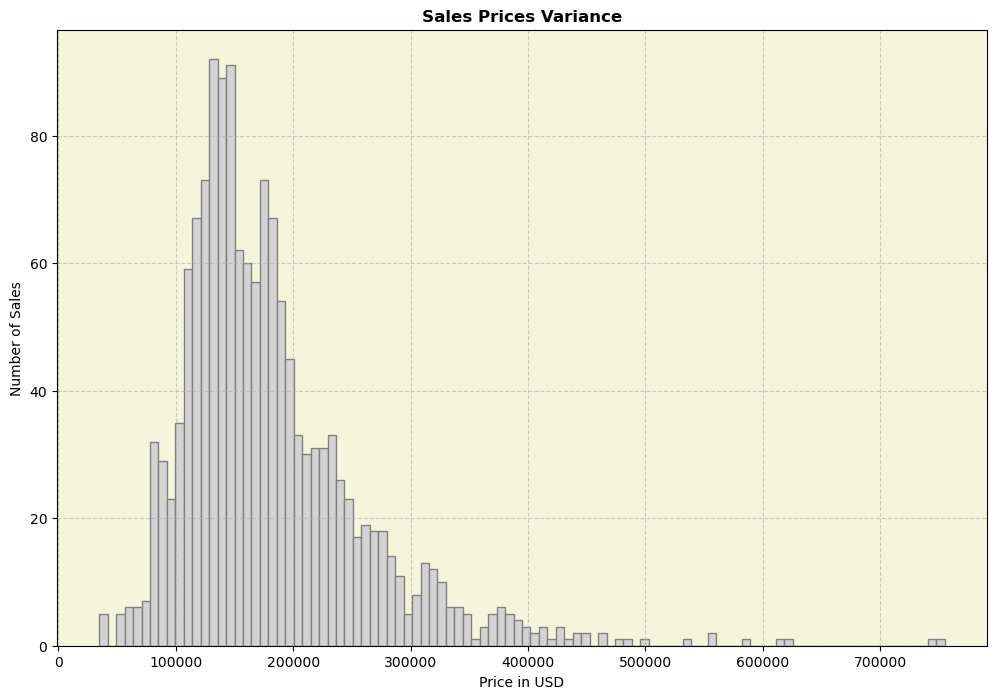

In [15]:
plt.figure(figsize=(12, 8))
plt.hist(x=train['SalePrice'], bins=100, color='lightgray', edgecolor='gray')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('Price in USD')
plt.ylabel('Number of Sales')
plt.title('Sales Prices Variance', fontweight='bold')
plt.gca().set_facecolor('beige')
plt.show()

For the exploratory data analysis (EDA) of numerical data, we applied a systematic approach that involved creating scatter plots for continuous variables and box plots for discrete variables. This approach allows us to gain valuable insights into the relationships between these numerical features and the target variable, which in this case was the Sale Price. 

In [ ]:
L = train_continuous.columns
for i in range(len(L)):
    plt.ylabel('Sale Price (USD)')
    plt.title('Sale Price vs. {L[i]}', fontweight='bold')
    plt.scatter(train_continuous[L[i]], np.log(train.SalePrice), color='lightgray', edgecolors='gray', alpha=0.7)
    plt.title(L[i])
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.gca().set_facecolor('beige')
    plt.show()

In [ ]:
L = train_discrete.columns
for i in range(len(L)):
    plt.ylabel('Sale Price (USD)')
    plt.title('Sale Price vs. {L[i]}', fontweight='bold')
    plt.boxplot(train_discrete[L[i]], vert=False)
    plt.title(L[i])
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.gca().set_facecolor('beige')
    plt.show()

To explore categorical data, we used a systematic method that worked for both types of categorical variables: nominal and ordinal. We used bar charts to show how many categories there were for each variable, and this helped us to understand how common and evenly distributed the different labels were.

In [ ]:
L = train_nominal.columns
for i in range(len(L)):
    feature_counts = train_nominal[L[i]].value_counts()
    feature_counts.plot(kind='bar', color='lightgray', edgecolor='gray', alpha=0.7)
    plt.xlabel(L[i])
    plt.ylabel('Count')
    plt.title(f'Distribution of {L[i]}', fontweight='bold')
    # Rotate x-axis labels for better readability if needed
    # plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.gca().set_facecolor('beige')
    plt.show()

In [ ]:
L = train_ordinal.columns
for i in range(len(L)):
    feature_counts = train_ordinal[L[i]].value_counts()
    feature_counts.plot(kind='bar', color='lightgray', edgecolor='gray', alpha=0.7)
    plt.xlabel(L[i])
    plt.ylabel('Count')
    plt.title(f'Distribution of {L[i]}', fontweight='bold')
    # Rotate x-axis labels for better readability if needed
    # plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.gca().set_facecolor('beige')
    plt.show()

## Modeling

Moving ahead, our next step is to enter the modeling phase. After researching this dataset, I've noticed that XGBoost consistently delivers acceptable results. Leveraging my prior experience with XGBoost, we've decided to opt for it as our model of choice. To streamline the selection process, we're utilizing a generic GridSearchCV code that doesn't necessitate any data alterations.

In [16]:
# ML models and packages
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_log_error, r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sma

Gradient Boosting Regression such as XGBoost can work with categorical data but they are designed for numerical data thus categorical data needs to be transformed into numerical data to suit the model , we can use methods such as Ordinal Encoding and One-Hot Encoding


In [17]:
# Transforming nominal data into numerical data using encoding
train_encoder_nominal = OrdinalEncoder()
train_nominal_encoded = pd.DataFrame(train_encoder_nominal.fit_transform(train_nominal))
train_nominal_encoded.columns = ['Alley', 'GarageType', 'MiscFeature','MSSubClass', 'MSZoning', 'Street', 'LandContour','LotConfig', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation','Heating', 'CentralAir', 'SaleType', 'SaleCondition']  

test_encoder_nominal = OrdinalEncoder()
test_nominal_encoded = pd.DataFrame(test_encoder_nominal.fit_transform(test_nominal))
test_nominal_encoded.columns = ['Alley', 'GarageType', 'MiscFeature','MSSubClass', 'MSZoning', 'Street', 'LandContour','LotConfig', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation','Heating', 'CentralAir', 'SaleType', 'SaleCondition']

In [18]:
train_nominal_encoded.head()

,Alley,GarageType,MiscFeature,MSSubClass,MSZoning,Street,LandContour,LotConfig,Neighborhood,Condition1,...,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,SaleType,SaleCondition
0,1.0,1.0,1.0,3.0,5.0,1.0,3.0,4.0,5.0,2.0,...,1.0,1.0,12.0,13.0,1.0,2.0,1.0,1.0,8.0,4.0
1,1.0,1.0,1.0,3.0,0.0,1.0,3.0,2.0,24.0,1.0,...,1.0,1.0,8.0,8.0,2.0,1.0,1.0,1.0,8.0,4.0
2,1.0,1.0,1.0,3.0,5.0,1.0,3.0,4.0,5.0,2.0,...,1.0,1.0,12.0,13.0,1.0,2.0,1.0,1.0,8.0,4.0
3,1.0,5.0,1.0,3.0,6.0,1.0,3.0,0.0,6.0,2.0,...,1.0,1.0,13.0,15.0,2.0,0.0,1.0,1.0,8.0,0.0
4,1.0,1.0,1.0,3.0,5.0,1.0,3.0,2.0,15.0,2.0,...,1.0,1.0,12.0,13.0,1.0,2.0,1.0,1.0,8.0,4.0


In [19]:
test_nominal_encoded.head()

,Alley,GarageType,MiscFeature,MSSubClass,MSZoning,Street,LandContour,LotConfig,Neighborhood,Condition1,...,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,SaleType,SaleCondition
0,1.0,1.0,1.0,2.0,0.0,1.0,3.0,4.0,12.0,1.0,...,1.0,0.0,10.0,12.0,2.0,1.0,0.0,1.0,8.0,4.0
1,1.0,1.0,0.0,3.0,0.0,1.0,3.0,0.0,12.0,2.0,...,3.0,0.0,11.0,13.0,1.0,1.0,0.0,1.0,8.0,4.0
2,1.0,1.0,1.0,3.0,5.0,1.0,3.0,4.0,8.0,2.0,...,1.0,0.0,10.0,12.0,2.0,2.0,0.0,1.0,8.0,4.0
3,1.0,1.0,1.0,3.0,5.0,1.0,3.0,4.0,8.0,2.0,...,1.0,0.0,10.0,12.0,1.0,2.0,0.0,1.0,8.0,4.0
4,1.0,1.0,1.0,3.0,11.0,1.0,1.0,4.0,22.0,2.0,...,1.0,0.0,6.0,6.0,2.0,2.0,0.0,1.0,8.0,4.0


In [ ]:
# # Transforming ordinal data into numerical data using encoding
train_encoder_ordinal = OrdinalEncoder()
train_ordinal_encoded = pd.DataFrame(train_encoder_ordinal.fit_transform(train_ordinal))
train_ordinal_encoded.columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtFinType1', 'BsmtFinType2', 'FireplaceQu','LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'PoolQC', 'Fence']

test_encoder_ordinal = OrdinalEncoder()
test_ordinal_encoded = pd.DataFrame(test_encoder_ordinal.fit_transform(test_ordinal))
test_ordinal_encoded.columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtFinType1', 'BsmtFinType2', 'FireplaceQu','LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'PoolQC', 'Fence']

In [ ]:
train_ordinal_encoded.head()

In [ ]:
test_ordinal_encoded.head()

In [ ]:
# Concatenating transformed data into one single data set
train_concat = pd.concat([ train_continuous, train_discrete,train_ordinal_encoded, train_nominal_encoded], axis=1).astype(float)
test_concat = pd.concat([ test_continuous, test_discrete, test_ordinal_encoded, test_nominal_encoded], axis=1).astype(float)

In [ ]:
train_concat.head()

In [ ]:
test_concat.head()

### Model Testing

In [ ]:
# Scale the features 
X_features = np.log1p(train_concat)
X_test_features = np.log1p(test_concat)

In [ ]:
# Setting a random state makes the results reproducible
xgb = XGBRegressor(random_state=123)
# Setting Y_labels as our target feature aka SalePrice of houses
Y_labels = train['SalePrice'].astype(float)

In [ ]:
# Assigning feature matrix (X) and target variable (Y) to X_train and Y_train
X_train, Y_train = X_features, Y_labels
# Define the machine learning model
model = xgb
# Split the data into training and testing sets (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=123)
# Fit the model to the training data using the natural logarithm of the target variable
model.fit(x_train, np.log(y_train))
# Make predictions on the training and testing data
pred_train = np.exp(model.predict(x_train))
pred_test = np.exp(model.predict(x_test))

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(y_train, pred_train, label='Training', alpha=0.5)
plt.scatter(y_test, pred_test, label='Validation', alpha=0.5)
max_val = max(np.max(y_train), np.max(y_test))
plt.plot([0, max_val], [0, max_val], color='red', linestyle='-', linewidth=2,)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().set_facecolor('beige')
plt.show()

Without any adjustments, the model achieved satisfactory results. Nevertheless, there is room for further improvement by fine-tuning parameters, employing grid search and cross-validation techniques, engaging in feature engineering, and removing irrelevant data points related to the target variable. These strategies can help us achieve even better performance in the competition.

### Feature engineering

In [ ]:
train_concat["totalSF"] = train_concat["TotalBsmtSF"] + train_concat["1stFlrSF"] + train_concat["2ndFlrSF"] + train_concat['GarageArea']
plt.scatter(train_concat['totalSF'], np.log(train.SalePrice), color='lightgray', edgecolors='gray', alpha=0.7)
plt.xlabel('Total SF'), plt.ylabel('Sale Price')
plt.title('Sale Price vs. totalSF', fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().set_facecolor('beige')
plt.show()

In [ ]:
# Recreating the new feature to the test data
test_concat["totalSF"] = test_concat["TotalBsmtSF"] + test_concat["1stFlrSF"] + test_concat["2ndFlrSF"] + test_concat['GarageArea']

### Irelivant Data & Multicollinearity

Variance Inflation Factor (VIF) is a statistical metric used to assess multicollinearity in a regression analysis. Multicollinearity occurs when independent variables in a regression model are highly correlated with each other, which can lead to unstable coefficient estimates. VIF quantifies how much the variance of an estimated regression coefficient is increased due to multicollinearity. Higher VIF values indicate a stronger correlation between predictor variables. In our analysis, we'll visualize the VIF scores to identify and address multicollinearity, ensuring the reliability of our regression model.

In [ ]:
# Now we need to filter the last thing to start modeling, irelivant data or in other words data that have low and high VIF (variance inflation factor) meaning the data lacks multicolinearity with the targert data
def VIF(data):
    dataset = pd.DataFrame(np.log1p(data))
    # intercept constant 
    dataset_intercept_const = sma.add_constant(dataset)
    dataset_vif = pd.DataFrame()
    dataset_vif['Feature'] = dataset_intercept_const.columns
    dataset_vif['VIF'] = [variance_inflation_factor(dataset_intercept_const.values, i) for i in range(dataset_intercept_const.shape[1])]
    return dataset_vif

In [ ]:
train_concat_vif = VIF(train_concat)
train_concat_vif

In [ ]:
# creates a heatmap to show the correlation between features and the target variable
plt.figure(figsize=(18, 18))
cmap = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(train_concat.corr(), linewidths=1, linecolor='darkgrey', cmap=cmap)
plt.title("Correlation Matrix Heatmap")
plt.show()

VIF Guidlines :
- VIF < 2.5: Very low multicollinearity.
- 2.5 < VIF < 5: Moderate multicollinearity.
- 5 < VIF < 10: Moderate to high multicollinearity.
- VIF > 10: High multicollinearity.

In our case we will stick to a VIF < 5.

In [ ]:
train_concat_vif = train_concat_vif[train_concat_vif['VIF'] < 5]
train_concat_vif

In [ ]:
for feature in train_concat_vif['Feature']:
    print(feature)

The features listed above have VIF scores below 5, and we plan to keep them. However, we'll also drop certain features with VIF scores below 5 due to their limited correlation with the target value, as evident from our heatmap analysis.

In [ ]:
train_concat = train_concat.drop(['WoodDeckSF', 'OpenPorchSF', 'MasVnrArea','BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF','MSZoning', 'GarageCars', 'GarageArea','FullBath', 'YearBuilt', 'TotRmsAbvGrd'], axis=1)
test_concat = test_concat.drop(['WoodDeckSF', 'OpenPorchSF', 'MasVnrArea','BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF','MSZoning', 'GarageCars', 'GarageArea','FullBath', 'YearBuilt', 'TotRmsAbvGrd'], axis=1)

In [ ]:
# creates a heatmap to show the correlation between features and the target variable
plt.figure(figsize=(18, 18))
cmap = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(train_concat.corr(), linewidths=1, linecolor='darkgrey', cmap=cmap)
plt.title("Correlation Matrix Heatmap")
plt.show()

### Adjusting the model parameters

In [ ]:
# We are re running the initial model because we added new features and dropped some data

# Scale the features 
X_features = np.log1p(train_concat)
X_test_features = np.log1p(test_concat)
# Setting a random state makes the results reproducible
xgb = XGBRegressor(random_state=123)
# Setting Y_labels as our target feature aka SalePrice of houses
Y_labels = train['SalePrice'].astype(float)
# Assigning feature matrix (X) and target variable (Y) to X_train and Y_train
X_train, Y_train = X_features, Y_labels
# Define the machine learning model
model = xgb
# Split the data into training and testing sets (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=123)
# Fit the model to the training data using the natural logarithm of the target variable
model.fit(x_train, np.log(y_train))
# Make predictions on the training and testing data
pred_train = np.exp(model.predict(x_train))
pred_test = np.exp(model.predict(x_test))

In [ ]:
# Importing the time packages so we could keep track on how long the model takes to run
import time
start_time = time.time()

# Suppress XGBoost warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# These paramaters were found through manual cross-validation and using different CV params and n_folds
params = {'n_estimators': [7200],'max_depth': [3],'subsample': [0.48]}

gsearch = GridSearchCV(estimator=XGBRegressor(colsample_bytree=0.2,gamma=0,learning_rate=0.01,max_depth=3,
                                              min_child_weight=1.7,n_estimators=7000,reg_alpha=0.9,reg_lambda=0.6,
                                              subsample=0.48,seed=123,silent=1),
          param_grid=params,
          scoring='neg_root_mean_squared_error',
          n_jobs=-1,
          cv=10
        )
gsearch.fit(X_features, np.log(Y_labels))
print(f'Time Elapsed: {time.time() - start_time}s')
print(f'Current Score: {abs(gsearch.best_score_)}')
reg = gsearch.best_estimator_
reg.fit(X_features, np.log(Y_labels))

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(y_train, pred_train, label='Training', alpha=0.5)
plt.scatter(y_test, pred_test, label='Validation', alpha=0.5)
max_val = max(np.max(y_train), np.max(y_test))
plt.plot([0, max_val], [0, max_val], color='red', linestyle='-', linewidth=2,)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().set_facecolor('beige')
plt.show()

In [ ]:
# Predict the sale price
predictions = reg.predict(np.log1p(test_concat))
# Create a dataframe from sale price predictions and test id column
predictions = pd.DataFrame(np.exp(predictions))
predictions.columns = ['SalePrice']
submission = pd.concat([test['Id'], predictions.astype(float)], axis=1)
print(submission.shape)
submission.to_csv('rsb10.csv', index=False)

Following adjustments to the model parameters, incorporation of new features, and the removal of irrelevant data with low correlation to the target variable, the submission files achieved a public score of 0.12374.